In [1]:
from google.colab import drive
drive.mount('/content/gdrive/')

Mounted at /content/gdrive/


In [2]:
!pip install livelossplot


     |████████████████████████████████| 793 kB 7.1 MB/s 
     |████████████████████████████████| 381 kB 33.0 MB/s 
  Attempting uninstall: prompt-toolkit
    Found existing installation: prompt-toolkit 1.0.18
    Uninstalling prompt-toolkit-1.0.18:
      Successfully uninstalled prompt-toolkit-1.0.18
  Attempting uninstall: ipython
    Found existing installation: ipython 5.5.0
    Uninstalling ipython-5.5.0:
      Successfully uninstalled ipython-5.5.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
jupyter-console 5.2.0 requires prompt-toolkit<2.0.0,>=1.0.0, but you have prompt-toolkit 3.0.29 which is incompatible.
google-colab 1.0.0 requires ipython~=5.5.0, but you have ipython 7.32.0 which is incompatible.


In [3]:
import os
import skimage.io as io
import torch
import torch.cuda
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mpl
plt.style.use('seaborn-whitegrid')
import numpy as np
import pandas as pd
from IPython.core.display import HTML
from torch.utils.data import Dataset, DataLoader
import cv2
import glob
import numpy
import random
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import matplotlib.pyplot as plt

In [4]:
import sys
import os, zipfile

#Unzipping the dataset
zip_ref = zipfile.ZipFile("/content/Dataset.zip", "r")
zip_ref.extractall()
zip_ref.close()


In [5]:
train_dataset_path ='/content/Dataset/train_set/images'
train_labels_path='/content/Dataset/train_set/annotations'

In [6]:
def Dataprep(imagespath, labelspath, savef):
  imagespath = imagespath
  labelspath = labelspath
  savef = savef

  Ind=[]
  i=0
  for dirname, _, filenames in os.walk(imagespath):
      for filename in filenames:
          Ind.insert(1,os.path.join(dirname, filename))
          i=i+1
  Image={"Image":Ind}
  dfx = pd.DataFrame(Image) 
  dfx
  
  Val=[]
  Exp=[]
  Aro=[]
  LM=[]
  # creating list for val, exp, aro, and lm
  for cls_pth in glob.glob(labelspath+'/*'):
    a=cls_pth
    if (a.split('/')[-1]).endswith('_val.npy'):
      b=np.load(a)
      b=np.asarray(b).astype(np.float32) 
      Val.append(b)
    elif(a.split('/')[-1]).endswith('_exp.npy'):
      ex=np.load(a)
      ex=np.asarray(ex).astype(np.float32)
      Exp.append(ex)
    elif(a.split('/')[-1]).endswith('_aro.npy'):
      ar=np.load(a)
      ar=np.asarray(ar).astype(np.float32)
      Aro.append(ar)
    elif(a.split('/')[-1]).endswith('_lnd.npy'):
      lam=ar=np.load(a)
      #
      lam=np.reshape(lam, (68,2), order='C')
      lam=np.asarray(lam).astype(np.float32)
      LM.append(lam)
    i=i+1

  print(Val[0])
  print(Exp[0])
  print(Aro[0])
  print(LM[0])
  label1={"Expression":Exp}
  label2={"Valance":Val}
  label3={"Arosual":Aro}
  Landmark={"Landmarks":LM}
  dflm= pd.DataFrame(Landmark) 
  dfy1 = pd.DataFrame(label1) 
  dfy1['Expression'] = dfy1['Expression'].astype(float, errors = 'raise')
  dfy2 = pd.DataFrame(label2)
  dfy2['Valance'] = dfy2['Valance'].astype(float, errors = 'raise')
  dfy3 = pd.DataFrame(label3)
  dfy3['Arosual'] = dfy3['Arosual'].astype(float, errors = 'raise')
  dfall= pd.concat([dfx,dflm, dfy1,dfy2,dfy3], axis=1)
  dfall.to_csv (r'{}.csv'.format(savef), index = True, header=True)
  #dfall.to_csv('file1.csv')
  return dfall

In [7]:
# for train dataset
savef = "file01"
dfall = Dataprep(train_dataset_path, train_labels_path, savef)

0.941663
1.0
-0.301587
[[ 28.486275  86.5427  ]
 [ 27.739609 108.827675]
 [ 28.21647  132.10551 ]
 [ 30.814117 154.75978 ]
 [ 36.335686 176.02768 ]
 [ 48.376472 194.03848 ]
 [ 64.68392  208.096   ]
 [ 82.79216  217.96411 ]
 [103.31608  221.17276 ]
 [127.07137  219.93773 ]
 [148.62431  210.90508 ]
 [169.55608  200.23178 ]
 [187.56392  186.144   ]
 [199.35373  166.95265 ]
 [205.80392  146.50206 ]
 [209.81961  123.89016 ]
 [212.9694    99.40151 ]
 [ 40.50196   71.48627 ]
 [ 51.25647   59.808   ]
 [ 66.999214  56.31481 ]
 [ 82.999214  59.160217]
 [ 96.727844  66.66119 ]
 [120.30118   67.39373 ]
 [138.08313   61.369946]
 [157.1702    61.34573 ]
 [174.51294   67.41189 ]
 [185.76941   79.97405 ]
 [109.04471   82.783134]
 [107.24392   96.180756]
 [105.34902  109.33016 ]
 [103.460396 122.86703 ]
 [ 88.727844 134.27892 ]
 [ 96.552155 137.54205 ]
 [104.60863  139.59438 ]
 [114.679214 138.34724 ]
 [123.70196  136.21016 ]
 [ 57.6       84.99287 ]
 [ 66.59137   80.40389 ]
 [ 77.82275   81.051674]
 [

In [8]:
dfall

,Image,Landmarks,Expression,Valance,Arosual
0,/content/Dataset/train_set/images/118.jpg,"[[28.486275, 86.5427], [27.739609, 108.827675]...",1.0,0.941663,-0.301587
1,/content/Dataset/train_set/images/3111.jpg,"[[24.528585, 88.03896], [22.89843, 109.812225]...",2.0,0.780711,0.055556
2,/content/Dataset/train_set/images/4508.jpg,"[[-13.741989, 100.80293], [-10.106387, 129.195...",1.0,-0.419763,0.404762
3,/content/Dataset/train_set/images/4457.jpg,"[[37.643238, 110.43436], [43.763012, 128.8], [...",2.0,0.871291,-0.555556
4,/content/Dataset/train_set/images/2160.jpg,"[[42.94339, 91.5839], [43.00374, 112.40292], [...",1.0,0.681504,0.785024
...,...,...,...,...,...
3480,/content/Dataset/train_set/images/4986.jpg,"[[6.075817, 86.31205], [10.438693, 111.55462],...",1.0,-0.754936,0.055556
3481,/content/Dataset/train_set/images/628.jpg,"[[1.0462276, 85.0657], [4.4531736, 112.96388],...",0.0,0.246806,0.469415
3482,/content/Dataset/train_set/images/3500.jpg,"[[34.281384, 72.93668], [37.26397, 97.38084], ...",2.0,-0.055556,-0.198413
3483,/content/Dataset/train_set/images/529.jpg,"[[25.530376, 85.90656], [26.964352, 104.97221]...",0.0,0.007937,0.073326


In [9]:
# Giving the dir path to test set
test_dataset_path ='/content/Dataset/val_set/images'
test_labels_path='/content/Dataset/val_set/annotations'

In [10]:
# for test dataset
savef = "file02"
tfall = Dataprep(test_dataset_path, test_labels_path, savef)

-0.891612
6.0
0.460317
[[  2.8133333  64.1215   ]
 [  3.64       88.82139  ]
 [  7.6       114.311874 ]
 [ 12.16      138.83209  ]
 [ 18.733334  162.7414   ]
 [ 32.266666  184.08728  ]
 [ 53.81333   203.54053  ]
 [ 78.013336  217.13626  ]
 [105.62666   221.60428  ]
 [129.05333   216.81284  ]
 [147.41333   203.02545  ]
 [162.        186.84235  ]
 [173.73334   169.2338   ]
 [180.66667   147.89989  ]
 [188.13333   126.35037  ]
 [193.89333   106.801285 ]
 [195.74667    86.377754 ]
 [ 37.933334   55.269306 ]
 [ 54.56       51.040855 ]
 [ 71.666664   53.13711  ]
 [ 86.22667    57.97647  ]
 [ 99.94666    62.8877   ]
 [140.88       65.04385  ]
 [154.6        61.570053 ]
 [166.44       59.35401  ]
 [177.92       57.928555 ]
 [188.36       62.073154 ]
 [121.         81.59829  ]
 [121.56       98.30845  ]
 [122.26667   114.24     ]
 [122.69334   130.8783   ]
 [ 98.62666   139.01176  ]
 [107.88      142.11423  ]
 [117.05334   146.19893  ]
 [125.41333   144.01883  ]
 [132.6       140.73668  ]
 [ 56

In [11]:
tfall

,Image,Landmarks,Expression,Valance,Arosual
0,/content/Dataset/val_set/images/118.jpg,"[[2.8133333, 64.1215], [3.64, 88.82139], [7.6,...",6.0,-0.891612,0.460317
1,/content/Dataset/val_set/images/384.jpg,"[[37.242085, 110.771835], [38.425163, 129.4803...",6.0,0.015873,0.483092
2,/content/Dataset/val_set/images/167.jpg,"[[12.65871, 64.05083], [13.214193, 89.24423], ...",5.0,-0.176846,0.071429
3,/content/Dataset/val_set/images/166.jpg,"[[35.935547, 95.48509], [40.956966, 117.47782]...",1.0,-0.246032,0.745257
4,/content/Dataset/val_set/images/377.jpg,"[[23.12207, 99.667854], [23.438307, 120.94057]...",3.0,0.765579,-0.169356
...,...,...,...,...,...
351,/content/Dataset/val_set/images/63.jpg,"[[16.888634, 82.707695], [17.069927, 110.82590...",0.0,0.363618,0.809524
352,/content/Dataset/val_set/images/112.jpg,"[[13.530115, 78.78127], [14.057931, 100.6451],...",3.0,-0.293852,0.662989
353,/content/Dataset/val_set/images/205.jpg,"[[38.937416, 97.01288], [36.62239, 117.97966],...",5.0,0.825531,0.503291
354,/content/Dataset/val_set/images/121.jpg,"[[37.123333, 90.90667], [37.135, 110.46519], [...",2.0,0.067751,-0.164375


In [12]:
import pandas as pd
import numpy as np
import sys
import os
import random
from pathlib import Path

# Image processing
import imageio
import cv2
import skimage.transform
#from skimage.transform import rescale, resize, downscale_local_mean
# Charts
import matplotlib.pyplot as plt
import seaborn as sns

# ML, statistics
import scipy
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix, roc_curve, auc, roc_auc_score

# Tensorflow
#from sklearn.preprocessing import OneHotEncoder
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import Dense, Dropout, Flatten, Activation, GlobalAveragePooling2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.applications import Xception 

from tensorflow.keras.losses import CategoricalCrossentropy, MeanSquaredError, SparseCategoricalCrossentropy
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from tensorflow.keras.optimizers import Adam
from keras.layers import Input
from keras.models import Model
!pip install tensorflow-addons
!pip install tensorflow-Ranking
import tensorflow_ranking as tfr
import tensorflow_addons as tfa
import tensorflow_probability as tfp

from tensorflow.keras.utils import plot_model

#############################################
# Settings
#############################################
import os
# Any results you write to the current directory are saved as output.

# Settings
plt.style.use('fivethirtyeight')
#plt.style.use('seaborn')

# toy=True - development mode, small samples, limited training, fast run
# toy=False - full data, slow learning and run
toy=False

     |████████████████████████████████| 1.1 MB 5.6 MB/s 
     |████████████████████████████████| 141 kB 5.4 MB/s 
     |████████████████████████████████| 462 kB 42.8 MB/s 


In [13]:
class Generators:
    def __init__(self, train_df, test_df, dirt, dirs):
        self.batch_size=64
        self.img_size=(224,224)
        _datagen=ImageDataGenerator(rescale=1./255.)
        _datagen = ImageDataGenerator(
            rescale=None,
            validation_split=0.25,
            featurewise_center=False,
            featurewise_std_normalization=True,
            rotation_range=90,
            width_shift_range=0.2,            
            height_shift_range=0.2,
            horizontal_flip=True,
            vertical_flip=True,
            dtype=float
            )
        # Train generator
        self.train_generator = _datagen.flow_from_dataframe(
            dataframe=train_df,
            directory=dirt,
            x_col=np.asarray("Image"),
            y_col=['Expression','Valance','Arosual'],
            image_size=(224,224),
            has_ext=False,
            subset="training",
            batch_size=self.batch_size,
            seed=42,
            shuffle=True,
            class_mode="multi_output",            
            target_size=self.img_size)
        print('Train generator created')
        # Validation generator
        self.val_generator = _datagen.flow_from_dataframe(
            dataframe=train_df,
            directory=dirt,    
            x_col="Image",
            y_col=['Expression','Valance','Arosual'],
            has_ext=False,
            subset="validation",
            batch_size=self.batch_size,
            seed=42,
            shuffle=True,
            class_mode="multi_output",
            target_size=self.img_size)    
        print('Validation generator created')
        # Test generator
        test_datagen=ImageDataGenerator(rescale=1./255.)
        self.test_generator =test_datagen.flow_from_dataframe(
            dataframe=test_df,
            directory=dirs,
            x_col=np.asarray("Image"),
            y_col=['Expression','Valance','Arosual'],
            image_size=(224,224),
            has_ext=False,
            #subset="validation",
            batch_size=self.batch_size,
            seed=42,
            shuffle=False,
            #class_mode="multi_output", 
            class_mode = None,           
            target_size=self.img_size)
        print('Test Generator created')           

In [14]:
# Create generators        
generators = Generators(dfall,tfall, train_dataset_path, test_dataset_path)  

/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/image_data_generator.py:349: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, which overrides setting of `featurewise_center`.
  warnings.warn('This ImageDataGenerator specifies '
--- Logging error ---
Traceback (most recent call last):
  File "/usr/lib/python3.7/logging/__init__.py", line 1025, in emit
    msg = self.format(record)
  File "/usr/lib/python3.7/logging/__init__.py", line 869, in format
    return fmt.format(record)
  File "/usr/lib/python3.7/logging/__init__.py", line 608, in format
    record.message = record.getMessage()
  File "/usr/lib/python3.7/logging/__init__.py", line 369, in getMessage
    msg = msg % self.args
TypeError: not all arguments converted during string formatting
Call stack:
  File "/usr/lib/python3.7/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/usr/lib/python3.7/runpy.py", line 85, in _run_code
    exec(code, run_globals)


Found 2614 validated image filenames.
Train generator created
Found 871 validated image filenames.
Validation generator created
Found 356 validated image filenames.
Test Generator created


--- Logging error ---
Traceback (most recent call last):
  File "/usr/lib/python3.7/logging/__init__.py", line 1025, in emit
    msg = self.format(record)
  File "/usr/lib/python3.7/logging/__init__.py", line 869, in format
    return fmt.format(record)
  File "/usr/lib/python3.7/logging/__init__.py", line 608, in format
    record.message = record.getMessage()
  File "/usr/lib/python3.7/logging/__init__.py", line 369, in getMessage
    msg = msg % self.args
TypeError: not all arguments converted during string formatting
Call stack:
  File "/usr/lib/python3.7/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/usr/lib/python3.7/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/usr/local/lib/python3.7/dist-packages/traitlets/config/application.py", line 846, in launch_instance
    app.start()
  File "/usr/local/lib/pytho

In [15]:
#from livelossplot import PlotLossesKerasTF
class ModelTrainer:
    """
    Create and fit the model
    """
    
    def __init__(self, generators):
        self.generators = generators
        self.img_width = generators.img_size[0]
        self.img_height = generators.img_size[1]
        
    def create_model(self, base_model):

      visible = Input(shape=(224,224,3))
      x= base_model(visible, training=True)
      flat = GlobalAveragePooling2D()(x)
      hidden1 = Dense(2048, activation='relu')(flat)
      hidden1 = Dense(1024, activation='relu')(hidden1)

      expression = Dense(8, name='expression')(hidden1)
      valence = Dense(1, activation='linear', name='valence')(hidden1)
      arrousal = Dense(1, activation='linear', name='arrousal')(hidden1)

      model = Model(inputs=visible, outputs=[expression,valence,arrousal])
      model.compile(optimizer=Adam(learning_rate=0.0001), 
                    loss=[SparseCategoricalCrossentropy(from_logits=True), MeanSquaredError(), MeanSquaredError()], 
                    loss_weights={'expression': 5, 'valence': 0.25, 'arrousal':0.25},
                    metrics={
                        #'sparse_categorical_accuracy':'SparseCategoricalCrossentropy()',#
                             'expression':'accuracy','expression':tfa.metrics.CohenKappa(num_classes=8,sparse_labels=True),'valence': 'RootMeanSquaredError', 'arrousal':'RootMeanSquaredError'}) 
      #,'expression':tfa.metrics.CohenKappa(num_classes=8,sparse_labels=True)
      [print(i.shape, i.dtype) for i in model.inputs]
      [print(o.shape, o.dtype) for o in model.outputs]
      [print(l.name, l.input_shape, l.dtype) for l in model.layers]

      return model
        
    
    def train(self, model):
        #%time
        steps_per_epoch = generators.train_generator.n//generators.train_generator.batch_size
        epochs=45
        validation_steps=5
        # for stopping training if no improvement in results after certain epochs
        earlystopper = EarlyStopping(monitor='val_acc', patience=10, verbose=1)
        reduce_lr = ReduceLROnPlateau(monitor='val_acc', factor=0.5, patience=2, 
                                   verbose=1, mode='max', min_lr=0.00001)
        # Save the best model during the traning
        checkpointer = ModelCheckpoint('/content/gdrive/MyDrive/best_model1.h5'
                                        #,monitor='val_acc'
                                        ,verbose=1
                                        #,save_best_only=True
                                        ,save_weights_only=True)
        #callbacks = [PlotLossesKerasTF(), checkpointer, reduce_lr]
        # Train
        training = model.fit_generator(generator=self.generators.train_generator
                                ,epochs=epochs,
                                #steps_per_epoch=steps_per_epoch,
                                validation_data=self.generators.val_generator
                                ,validation_steps=validation_steps,
                                callbacks=[checkpointer]
                                #,callbacks=[checkpointer, reduce_lr]
                                )


        # Get the best saved weights
        model.load_weights('/content/gdrive/MyDrive/best_model1.h5')
        return training


In [37]:
# base model defined
xception_base_model=Xception(weights="imagenet",
                             include_top=False,
                             input_shape =(224, 224,3))
   
# Create and train the model
trainer = ModelTrainer(generators)
model = trainer.create_model(xception_base_model)
#summarize model
model.summary()

83697664/83683744 [==============================] - 1s 0us/step
(None, 224, 224, 3) <dtype: 'float32'>
(None, 8) <dtype: 'float32'>
(None, 1) <dtype: 'float32'>
(None, 1) <dtype: 'float32'>
input_5 [(None, 224, 224, 3)] float32
xception (None, 224, 224, 3) float32
global_average_pooling2d_1 (None, 7, 7, 2048) float32
dense_2 (None, 2048) float32
dense_3 (None, 2048) float32
expression (None, 1024) float32
valence (None, 1024) float32
arrousal (None, 1024) float32
Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_5 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 xception (Function

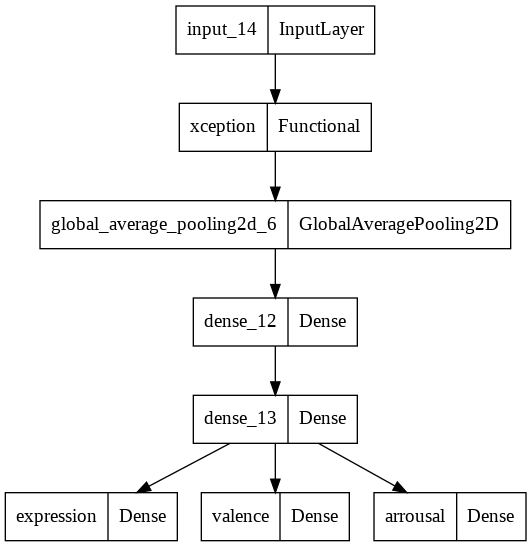

In [ ]:
# plot model architecture
plot_model(model, show_shapes=False, to_file='inception.png')

In [ ]:
training=trainer.train(model)
print("Training complete")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:61: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/image_data_generator.py:728: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


Epoch 1/45
41/41 [==============================] - ETA: 0s - loss: 8.0362 - expression_loss: 1.5878 - valence_loss: 0.2856 - arrousal_loss: 0.1027 - expression_cohen_kappa: -0.0034 - valence_root_mean_squared_error: 0.5345 - arrousal_root_mean_squared_error: 0.3204
Epoch 1: saving model to /content/gdrive/MyDrive/best_model1.h5
41/41 [==============================] - 69s 2s/step - loss: 8.0362 - expression_loss: 1.5878 - valence_loss: 0.2856 - arrousal_loss: 0.1027 - expression_cohen_kappa: -0.0034 - valence_root_mean_squared_error: 0.5345 - arrousal_root_mean_squared_error: 0.3204 - val_loss: 7.5585 - val_expression_loss: 1.4924 - val_valence_loss: 0.2772 - val_arrousal_loss: 0.1080 - val_expression_cohen_kappa: 0.0000e+00 - val_valence_root_mean_squared_error: 0.5265 - val_arrousal_root_mean_squared_error: 0.3286
Epoch 2/45
41/41 [==============================] - ETA: 0s - loss: 7.6810 - expression_loss: 1.5176 - valence_loss: 0.2717 - arrousal_loss: 0.1003 - expression_cohen_kapp

In [ ]:
# list all data in history
print(training.history.keys())

dict_keys(['loss', 'expression_loss', 'valence_loss', 'arrousal_loss', 'expression_cohen_kappa', 'valence_root_mean_squared_error', 'arrousal_root_mean_squared_error', 'val_loss', 'val_expression_loss', 'val_valence_loss', 'val_arrousal_loss', 'val_expression_cohen_kappa', 'val_valence_root_mean_squared_error', 'val_arrousal_root_mean_squared_error'])


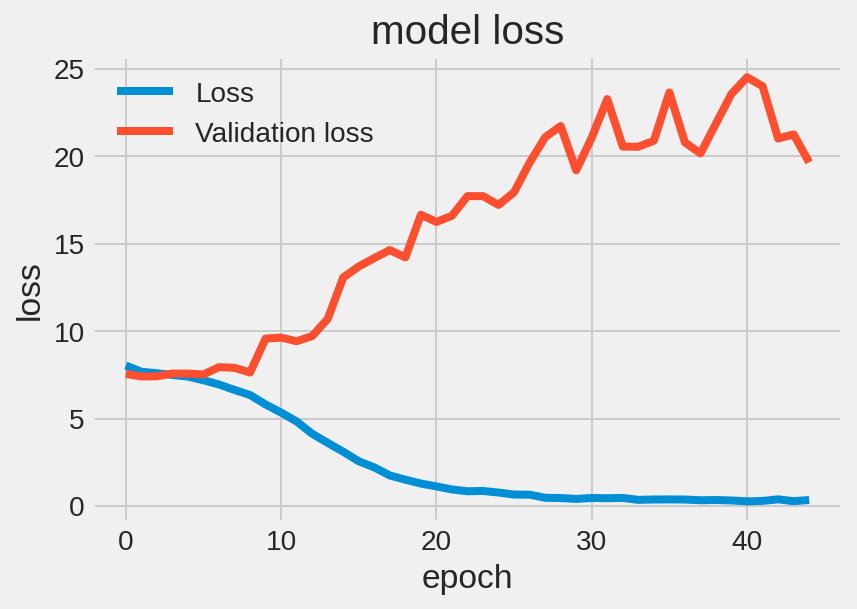

In [ ]:

# summarize history for accuracy
#plt.plot(training.history['sparse_categorical_accuracy'], label='Äccuracy')
#plt.plot(training.history['val_accuracy'], label='Validation Accuracy')
#plt.title('model accuracy')
#plt.ylabel('accuracy')
#plt.xlabel('epoch')
#plt.legend()
#plt.show()
# summarize history for loss
#steps=5
plt.plot(training.history['loss'], label="Loss")
plt.plot(training.history['val_loss'], label="Validation loss")
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend()
plt.show()

In [ ]:
# predicting on the model for f1-score
steps=5
# retrieve the expression valance and arousal 
expression, valance, arosual = model.predict_generator(generators.val_generator, steps=steps)
y_pred = np.argmax(expression, axis=1)
y_true=dfall['Expression'][:len(y_pred)]   

print(metrics.classification_report(y_true, y_pred))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/image_data_generator.py:728: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


              precision    recall  f1-score   support

         0.0       0.18      0.20      0.19        81
         1.0       0.44      0.54      0.49       155
         2.0       0.00      0.00      0.00        28
         3.0       0.00      0.00      0.00        17
         4.0       0.50      0.11      0.18         9
         5.0       0.00      0.00      0.00         2
         6.0       0.08      0.08      0.08        26
         7.0       0.00      0.00      0.00         2

    accuracy                           0.32       320
   macro avg       0.15      0.12      0.12       320
weighted avg       0.28      0.32      0.30       320



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


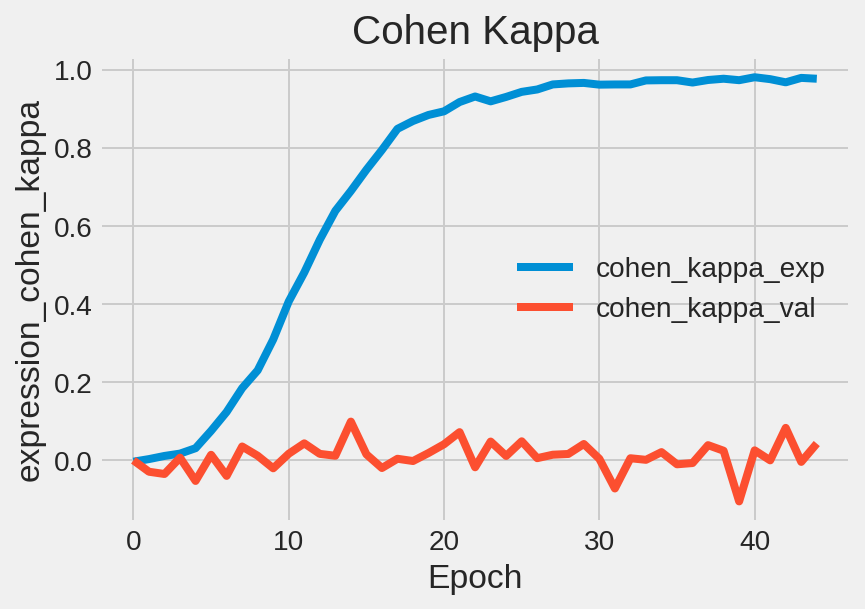

In [ ]:
#For Cohen Kappa
#steps=5
plt.plot(training.history['expression_cohen_kappa'], label="cohen_kappa_exp")
plt.plot(training.history['val_expression_cohen_kappa'], label="cohen_kappa_val")
plt.title('Cohen Kappa')
plt.xlabel('Epoch')
plt.ylabel('expression_cohen_kappa')
plt.legend()
plt.show()

In [17]:
from keras.preprocessing.image import img_to_array
from keras.applications.vgg16 import preprocess_input
from keras.applications.vgg16 import decode_predictions
from keras.applications.vgg16 import VGG16

In [38]:
vgg16_base_model = VGG16(weights= 'imagenet', 
                  include_top=False, 
                  input_shape=(224, 224, 3))

# Create and train the model
trainer2 = ModelTrainer(generators)
model2 = trainer2.create_model(vgg16_base_model)
#summarize model
model2.summary()

(None, 224, 224, 3) <dtype: 'float32'>
(None, 8) <dtype: 'float32'>
(None, 1) <dtype: 'float32'>
(None, 1) <dtype: 'float32'>
input_7 [(None, 224, 224, 3)] float32
vgg16 (None, 224, 224, 3) float32
global_average_pooling2d_2 (None, 7, 7, 512) float32
dense_4 (None, 512) float32
dense_5 (None, 2048) float32
expression (None, 1024) float32
valence (None, 1024) float32
arrousal (None, 1024) float32
Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_7 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 vgg16 (Functional)             (None, 7, 7, 512)    14714688    ['input_7[0][0]']       

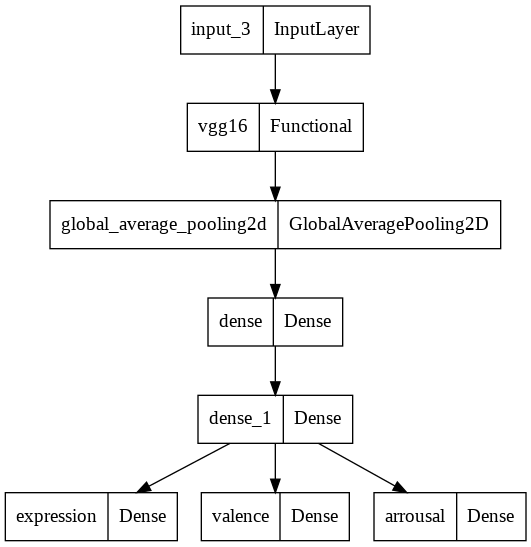

In [21]:
# plot model architecture
plot_model(model2, show_shapes=False, to_file='vgg16.png')

In [22]:
training2=trainer2.train(model2)
print("Training complete")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:61: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/image_data_generator.py:728: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


Epoch 1/45
41/41 [==============================] - ETA: 0s - loss: 8.3368 - expression_loss: 1.6388 - valence_loss: 0.3895 - arrousal_loss: 0.1824 - expression_cohen_kappa: 0.0075 - valence_root_mean_squared_error: 0.6241 - arrousal_root_mean_squared_error: 0.4271
Epoch 1: saving model to /content/gdrive/MyDrive/best_model1.h5
41/41 [==============================] - 115s 2s/step - loss: 8.3368 - expression_loss: 1.6388 - valence_loss: 0.3895 - arrousal_loss: 0.1824 - expression_cohen_kappa: 0.0075 - valence_root_mean_squared_error: 0.6241 - arrousal_root_mean_squared_error: 0.4271 - val_loss: 7.2718 - val_expression_loss: 1.4346 - val_valence_loss: 0.2911 - val_arrousal_loss: 0.1042 - val_expression_cohen_kappa: 0.0000e+00 - val_valence_root_mean_squared_error: 0.5396 - val_arrousal_root_mean_squared_error: 0.3228
Epoch 2/45
41/41 [==============================] - ETA: 0s - loss: 7.7144 - expression_loss: 1.5248 - valence_loss: 0.2658 - arrousal_loss: 0.0947 - expression_cohen_kappa

In [23]:
# list all data in history
print(training2.history.keys())

dict_keys(['loss', 'expression_loss', 'valence_loss', 'arrousal_loss', 'expression_cohen_kappa', 'valence_root_mean_squared_error', 'arrousal_root_mean_squared_error', 'val_loss', 'val_expression_loss', 'val_valence_loss', 'val_arrousal_loss', 'val_expression_cohen_kappa', 'val_valence_root_mean_squared_error', 'val_arrousal_root_mean_squared_error'])


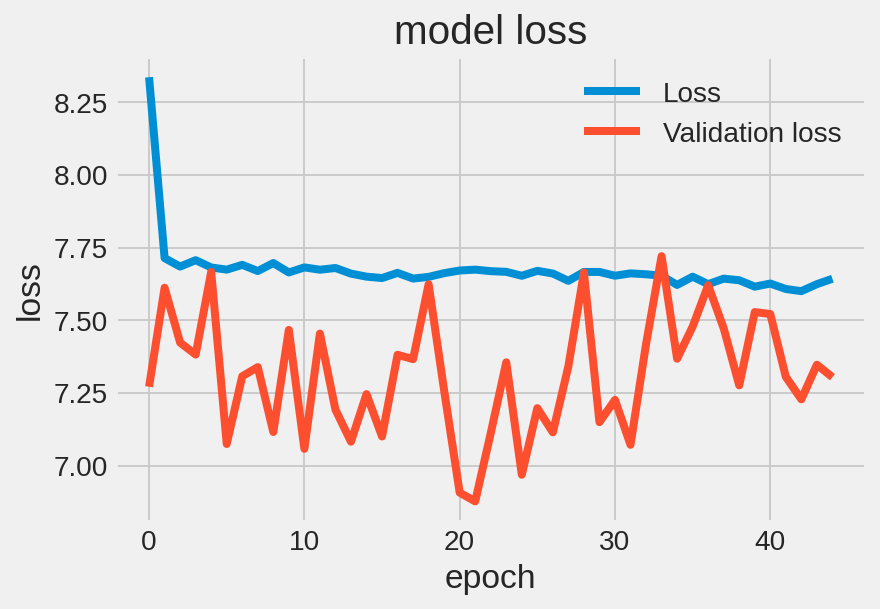

In [24]:
# summarize history for accuracy
#plt.plot(training.history['sparse_categorical_accuracy'], label='Äccuracy')
#plt.plot(training.history['val_accuracy'], label='Validation Accuracy')
#plt.title('model accuracy')
#plt.ylabel('accuracy')
#plt.xlabel('epoch')
#plt.legend()
#plt.show()
# summarize history for loss
#steps=5
plt.plot(training2.history['loss'], label="Loss")
plt.plot(training2.history['val_loss'], label="Validation loss")
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend()
plt.show()

In [26]:
# predicting on the model for f1-score
steps=5
# retrieve the expression valance and arousal 
expression2, valance2, arosual2 = model2.predict_generator(generators.val_generator, steps=steps)
y_pred2 = np.argmax(expression2, axis=1)
y_true2=dfall['Expression'][:len(y_pred2)]   

print(metrics.classification_report(y_true2, y_pred2))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/image_data_generator.py:728: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00        81
         1.0       0.48      1.00      0.65       155
         2.0       0.00      0.00      0.00        28
         3.0       0.00      0.00      0.00        17
         4.0       0.00      0.00      0.00         9
         5.0       0.00      0.00      0.00         2
         6.0       0.00      0.00      0.00        26
         7.0       0.00      0.00      0.00         2

    accuracy                           0.48       320
   macro avg       0.06      0.12      0.08       320
weighted avg       0.23      0.48      0.32       320



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


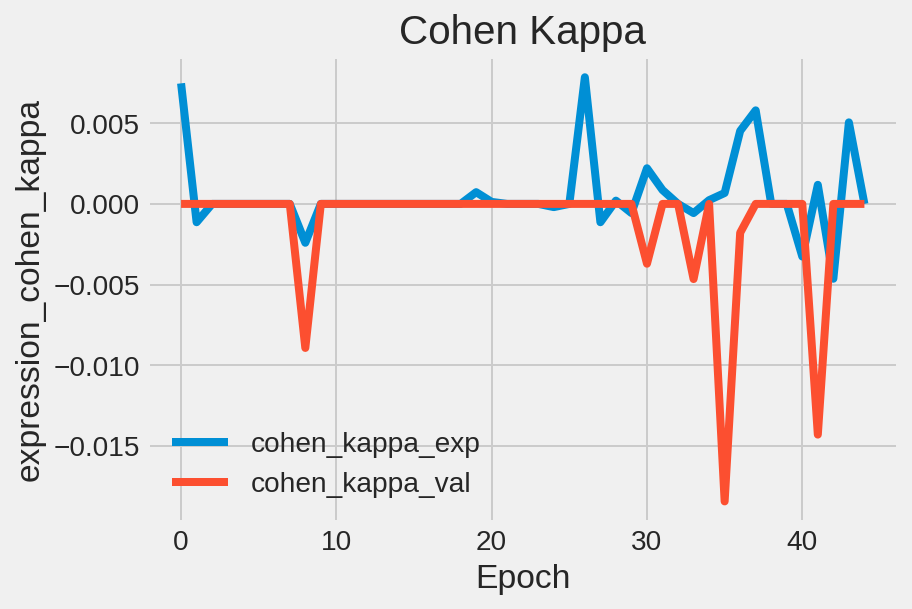

In [27]:
#For Cohen Kappa
#steps=5
plt.plot(training2.history['expression_cohen_kappa'], label="cohen_kappa_exp")
plt.plot(training2.history['val_expression_cohen_kappa'], label="cohen_kappa_val")
plt.title('Cohen Kappa')
plt.xlabel('Epoch')
plt.ylabel('expression_cohen_kappa')
plt.legend()
plt.show()

In [28]:
import sklearn.externals
import joblib
joblib.dump(training2, '/content/gdrive/MyDrive/mariam/model_Vgg.pkl', compress=1)

INFO:tensorflow:Assets written to: ram://be1b7d4c-1c1a-4fb4-9f55-fb69e7b37621/assets


['/content/gdrive/MyDrive/baria/model_Vgg.pkl']

In [30]:
mod=joblib.load( '/content/gdrive/MyDrive/mariam/model_Vgg.pkl')

In [32]:
# list all data in history
print(mod.history.keys())

dict_keys(['loss', 'expression_loss', 'valence_loss', 'arrousal_loss', 'expression_cohen_kappa', 'valence_root_mean_squared_error', 'arrousal_root_mean_squared_error', 'val_loss', 'val_expression_loss', 'val_valence_loss', 'val_arrousal_loss', 'val_expression_cohen_kappa', 'val_valence_root_mean_squared_error', 'val_arrousal_root_mean_squared_error'])


In [40]:
model2.load_weights('/content/gdrive/MyDrive/best_model1.h5')

In [42]:
# predicting on the model for f1-score
steps=5
# retrieve the expression valance and arousal 
expression3, valance3, arosual3 = model2.predict_generator(generators.val_generator, steps=steps)
y_pred3 = np.argmax(expression2, axis=1)
y_true3=dfall['Expression'][:len(y_pred3)]   

print(metrics.classification_report(y_true3, y_pred3))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/image_data_generator.py:728: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00        81
         1.0       0.48      1.00      0.65       155
         2.0       0.00      0.00      0.00        28
         3.0       0.00      0.00      0.00        17
         4.0       0.00      0.00      0.00         9
         5.0       0.00      0.00      0.00         2
         6.0       0.00      0.00      0.00        26
         7.0       0.00      0.00      0.00         2

    accuracy                           0.48       320
   macro avg       0.06      0.12      0.08       320
weighted avg       0.23      0.48      0.32       320



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [44]:
def SAGR(ground_truth, predictions):
    """
        Evaluates the SAGR between estimate and ground truth.
    """
    return np.mean(np.sign(ground_truth) == np.sign(predictions))

In [45]:
SAGR(y_true3, y_pred3)

0.746875

In [ ]:
emotion, valance, arosual = model2.predict_generator(generators.test_generator)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  """Entry point for launching an IPython kernel.


In [ ]:
predictions = np.argmax(emotion, axis=1)
image_paths = dfall_test['Image'][:len(predictions)]   
true_class=dfall_test['Expression'][:len(predictions)]  

Showing correct predictions
{37, 105, 234, 10, 340, 21, 278, 152, 190}


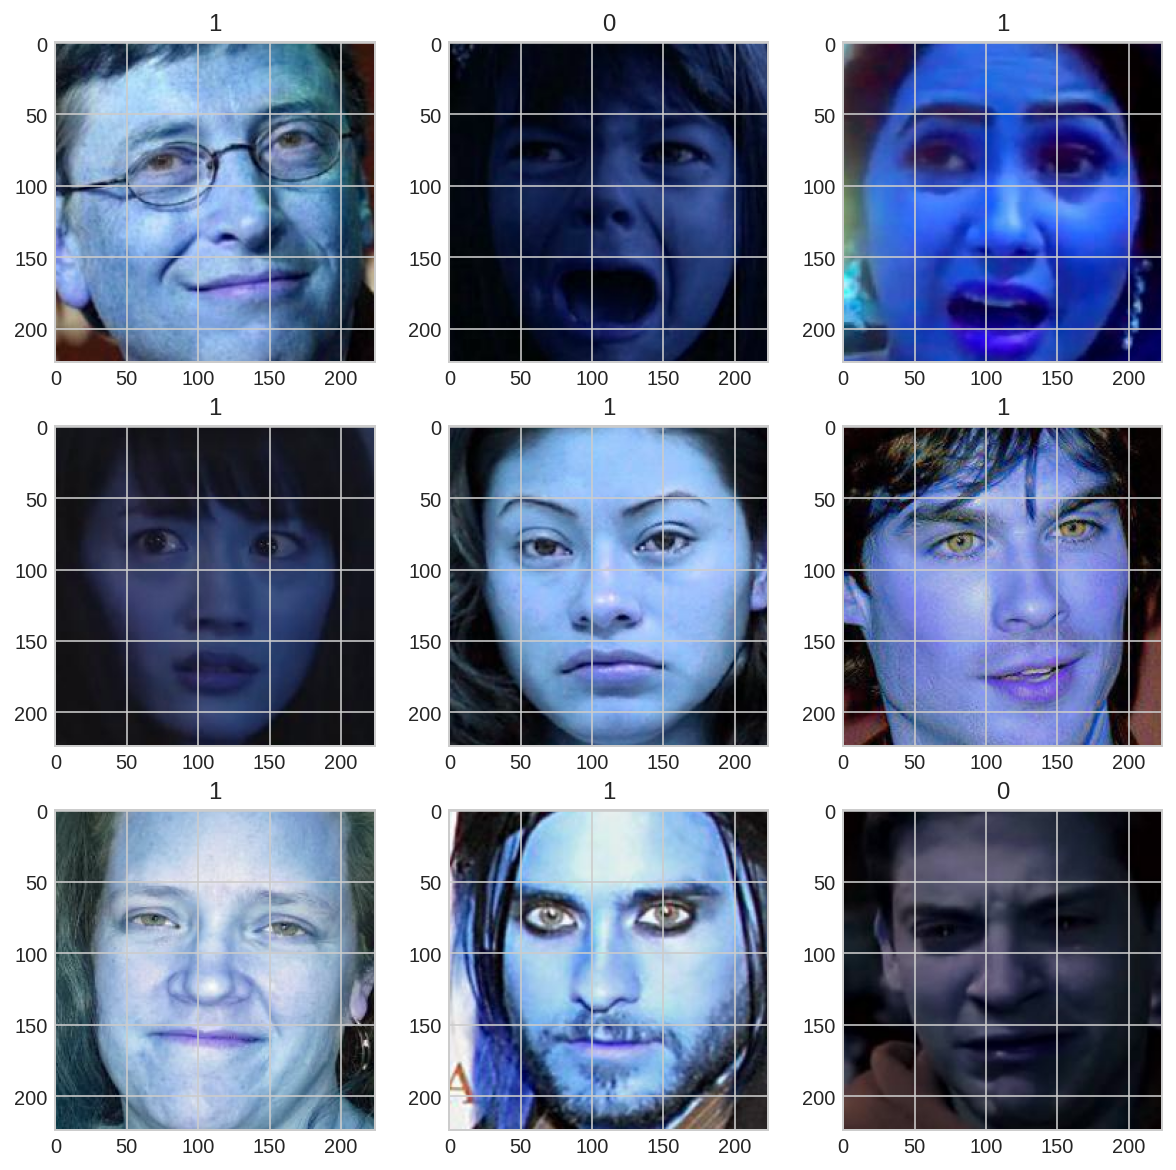

Showing wrong predictions
{71, 138, 42, 240, 274, 244, 213, 120, 125}


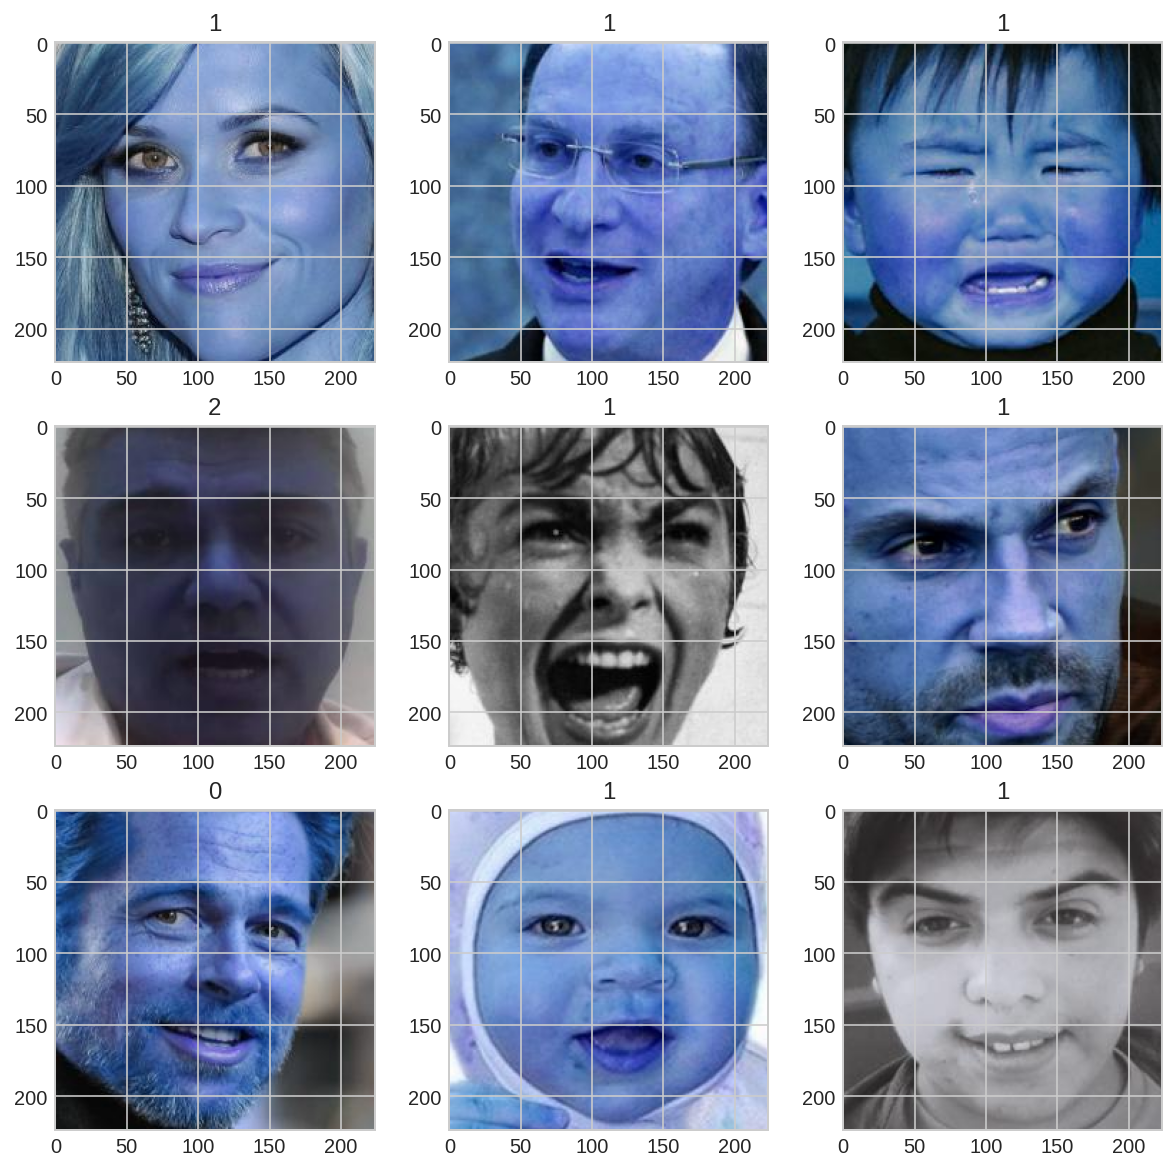

In [ ]:
 #Seperating indices for correctly and incorrectly predicted samples
correct_preds = np.array(true_class) == np.array(predictions)
correct_inds, incorrect_inds = [],[]

for i,x in enumerate(correct_preds):
  if x:
    correct_inds.append(i)
  else:
    incorrect_inds.append(i)

#choose random correct and incorrect samples
correct_inds = set(np.random.choice(correct_inds, size=9))
incorrect_inds = set(np.random.choice(incorrect_inds, size=9))


print("Showing correct predictions")
print(correct_inds)
imgs, labels = [], []
for i,x in enumerate(correct_inds):
  imgs.append(cv2.imread(image_paths[x]))
  labels.append(predictions[x])
_, axs = plt.subplots(3, 3, figsize=(10, 10))
axs = axs.flatten()
for img, ax, l in zip(imgs, axs, labels):
    ax.imshow(img)
    ax.set_title(l)
plt.show()


print("Showing wrong predictions")
print(incorrect_inds)
imgs, labels = [], []
for i,x in enumerate(incorrect_inds):
  imgs.append(cv2.imread(image_paths[x]))
  labels.append(predictions[x])
_, axs = plt.subplots(3, 3, figsize=(10, 10))
axs = axs.flatten()
for img, ax, l in zip(imgs, axs, labels):
   ax.imshow(img)
   ax.set_title(l)
plt.show()